In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import scipy.stats as stats
from scipy.stats import linregress

# Import API keys
from api_keys import g_key
from api_keys import meteostat_api_key
from api_keys import open_cage_api_key

gmaps.configure(api_key=g_key)

In [4]:
# Contains the info for every taxi cab ride in New York City in January-June 2019
taxi_data = pd.read_csv("../resources/taxi_data/combined_months.csv")

# Contains each official Taxi Pickup Zone in NYC 
pickup_zone_data = pd.read_csv("../resources/taxi_data/nyc_pickup_zones.csv")
pickup_zone_data = pickup_zone_data.rename(columns={'OBJECTID': 'PULocationID'})


# Importing the json to lookup coordinates of each Taxi Pickup Zone
with open("../resources/taxi_data/neighborhoods.json") as json_data:
    neighborhood_data = json.load(json_data)
json_dict={}
for i in neighborhood_data['features']:
    try:
        name = i['properties']['name']
        coords = i['geometry']['coordinates']
        json_dict[name] = coords
    except:
        pass

    
# Read in the Weather CVS data    
file_to_load = "../resources/weather_data/ny_weather_0119-0619.csv"
weather_df = pd.read_csv(file_to_load)
weather_df_cleaned = weather_df.drop(columns = ['Unnamed: 0', 'Avg Temp', 'Wind Direction', 'Wind Peak Gust', 'Air Pressure', 'Total Sun Duration'])
weather_df_cleaned['date'] = pd.to_datetime(weather_df_cleaned.date).dt.date

In [5]:
# Merging the 'taxi_data' and 'pickup_zone_data' on PULocationID (aka Zone ID)
# This is essentially grabbing the PULocationID from 'taxi_data' and finding it's name in 'pickup_zone_data'
merged_taxi_zones = pd.merge(taxi_data,pickup_zone_data, how='inner',on="PULocationID")

# Filtering the 'merged_taxi_zones' dataframe so it only include rides that happened in Manhattan
manhattan_taxi_zones = merged_taxi_zones[(merged_taxi_zones['borough']=='Manhattan')]

# Counting the number of pickups in each pickup zone
manhattan_taxi_zones.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime']).dt.date
manhattan_taxi_zones.sort_values(by='tpep_pickup_datetime', ascending=False)
manhattan_taxi_zones['zone'] = manhattan_taxi_zones['zone'].replace(['Upper West Side South',
                'Meatpacking/West Village West',
                'Greenwich Village South',
                'Midtown Center',
                'Lincoln Square East',
                'Lenox Hill East',
                'Clinton East',
                'Penn Station/Madison Sq West',
                'Upper East Side South',
                 'East Harlem South',
                 'Sutton Place/Turtle Bay North',
                 'Upper East Side North',
                 'East Chelsea',
                 'Yorkville East',
                 'Midtown East',
                 'Little Italy/NoLiTa',
                 'Clinton West',
                 'TriBeCa/Civic Center',
                 'Midtown North',
                 'Lincoln Square West',
                 'West Chelsea/Hudson Yards',
                 'Upper West Side North',
                 'Yorkville West',
                 'Greenwich Village North',
                 'Lenox Hill West',
                 'UN/Turtle Bay South',
                 'Stuy Town/Peter Cooper Village',
                 'Central Harlem North',
                 'Financial District South',
                 'Battery Park',
                 'Times Sq/Theatre District',
                 'Seaport',
                 'Two Bridges/Seward Park',
               'East Harlem North',
               'Alphabet City',
                'Kips Bay',
                'Garment District',
                'Financial District North',
                'SoHo',
                'Union Sq',
                'Bloomingdale',
                'Central Park'],
                ['Upper West Side',
                'West Village',
                'Greenwich Village',
                'Midtown',
                'Lincoln Square',
                'Lenox Hill',
                'Clinton',
                'Madison',
                'Upper East Side',
                'East Harlem',
                'Turtle Bay',
                'Upper East Side',
                'Chelsea',
                'Yorkville',
                'Midtown',
                'Little Italy',
                'Clinton',
                'Civic Center',
                'Midtown',
                'Lincoln Square',
                'Chelsea',
                'Upper West Side',
                'Yorkville',
                'Greenwich Village',
                'Lenox Hill',
                'Turtle Bay',
                'Stuyvesant Town',
                'Central Harlem',
                    'Financial District',
                    'Financial District',
                    'Midtown',
                'Two Bridges',
                'Two Bridges',
                'East Harlem',
                'East Village',
                'Murray Hill',
                'Midtown',
                'Financial District',
                'Soho',
                'Midtown',
                'Upper East Side',
                'Midtown'])

latitudes = []
longitudes = []

for index, row in manhattan_taxi_zones.iterrows():
    try:
        zone = row['zone']
        coordinates = json_dict[zone]
        longitudes.append(coordinates[0])
        latitudes.append(coordinates[1])
    except:
        latitudes.append(np.nan)
        longitudes.append(np.nan)
        print("Skip/NaN")
manhattan_taxi_zones['Latitude'] = latitudes
manhattan_taxi_zones['Longitude'] = longitudes

#print(latitudes)
        
manhattan_taxi_zones


C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
Skip/NaN
S

C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ca,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Shape_Leng,zone,borough,Latitude,Longitude
0,6664.0,1.0,2019-01-01,1/1/2019 0:35,1.0,5.60,1.0,N,158.0,236.0,...,0.00,0.0,0.3,24.80,NaN,0.054810,West Village,Manhattan,40.734434,-74.00618
1,10283.0,2.0,2019-01-01,1/1/2019 1:11,1.0,1.65,1.0,N,158.0,148.0,...,2.16,0.0,0.3,12.96,NaN,0.054810,West Village,Manhattan,40.734434,-74.00618
2,24495.0,1.0,2019-01-01,1/1/2019 1:19,1.0,1.10,1.0,N,158.0,186.0,...,1.45,0.0,0.3,8.75,NaN,0.054810,West Village,Manhattan,40.734434,-74.00618
3,15829.0,2.0,2019-01-01,1/1/2019 1:42,1.0,1.77,1.0,N,158.0,186.0,...,0.00,0.0,0.3,9.30,NaN,0.054810,West Village,Manhattan,40.734434,-74.00618
4,22484.0,1.0,2019-01-01,1/1/2019 2:04,3.0,2.70,1.0,N,158.0,87.0,...,2.65,0.0,0.3,15.95,NaN,0.054810,West Village,Manhattan,40.734434,-74.00618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593198,2659228.0,2.0,2019-05-11,5/11/2019 10:37,1.0,2.67,1.0,N,153.0,20.0,...,0.00,0.0,0.3,11.30,0.0,0.024737,Marble Hill,Manhattan,40.876551,-73.91066
593199,2547957.0,2.0,2019-06-11,6/11/2019 23:47,1.0,0.85,1.0,N,153.0,127.0,...,0.00,0.0,0.3,6.30,0.0,0.024737,Marble Hill,Manhattan,40.876551,-73.91066
593200,5277542.0,2.0,2019-06-23,6/23/2019 16:54,1.0,0.69,1.0,N,153.0,127.0,...,1.06,0.0,0.3,6.36,0.0,0.024737,Marble Hill,Manhattan,40.876551,-73.91066
593201,6350280.0,1.0,2019-06-28,6/28/2019 7:29,0.0,6.70,1.0,N,153.0,41.0,...,0.00,0.0,0.3,23.80,0.0,0.024737,Marble Hill,Manhattan,40.876551,-73.91066


# Ride Pickups Around Manhattan #

In [6]:
# Creating Heatmaps
heatmap_df = manhattan_taxi_zones[["Latitude","Longitude","zone"]]


# heatmap_df_sample
heatmap_df = heatmap_df.dropna()
locations = heatmap_df[["Latitude","Longitude"]].astype(float)
weights = heatmap_df["zone"]


heatmap_df
figure_layout = {
    'width': '400px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px'}
center = (40.75, -74.00)
fig = gmaps.figure(layout=figure_layout,center=center,zoom_level=12)
heat_layer = gmaps.heatmap_layer(locations,point_radius =45)


fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='1px', width='400px'))

# Ride Volume By Day #

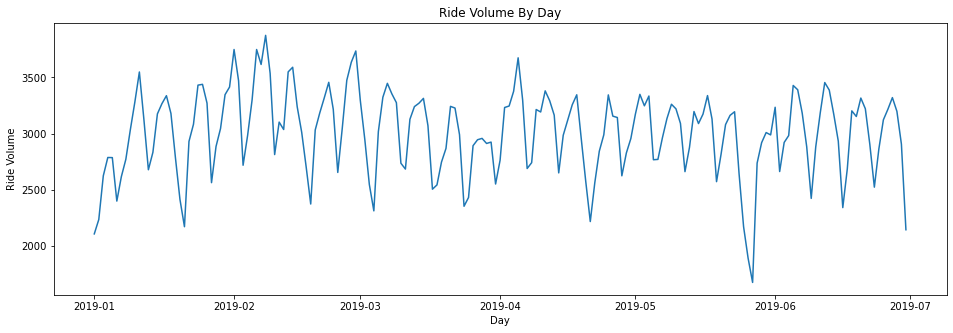

In [7]:
ride_volume_per_day = manhattan_taxi_zones["tpep_pickup_datetime"].value_counts()

ride_volume_per_day_df = pd.DataFrame(ride_volume_per_day).reset_index()
ride_volume_per_day_df.sort_values(by ='index')
plt.figure(figsize=(16,5))
plt.title("Ride Volume By Day")
plt.xlabel("Day")
plt.ylabel("Ride Volume")
ride_volume_per_day.plot.line()

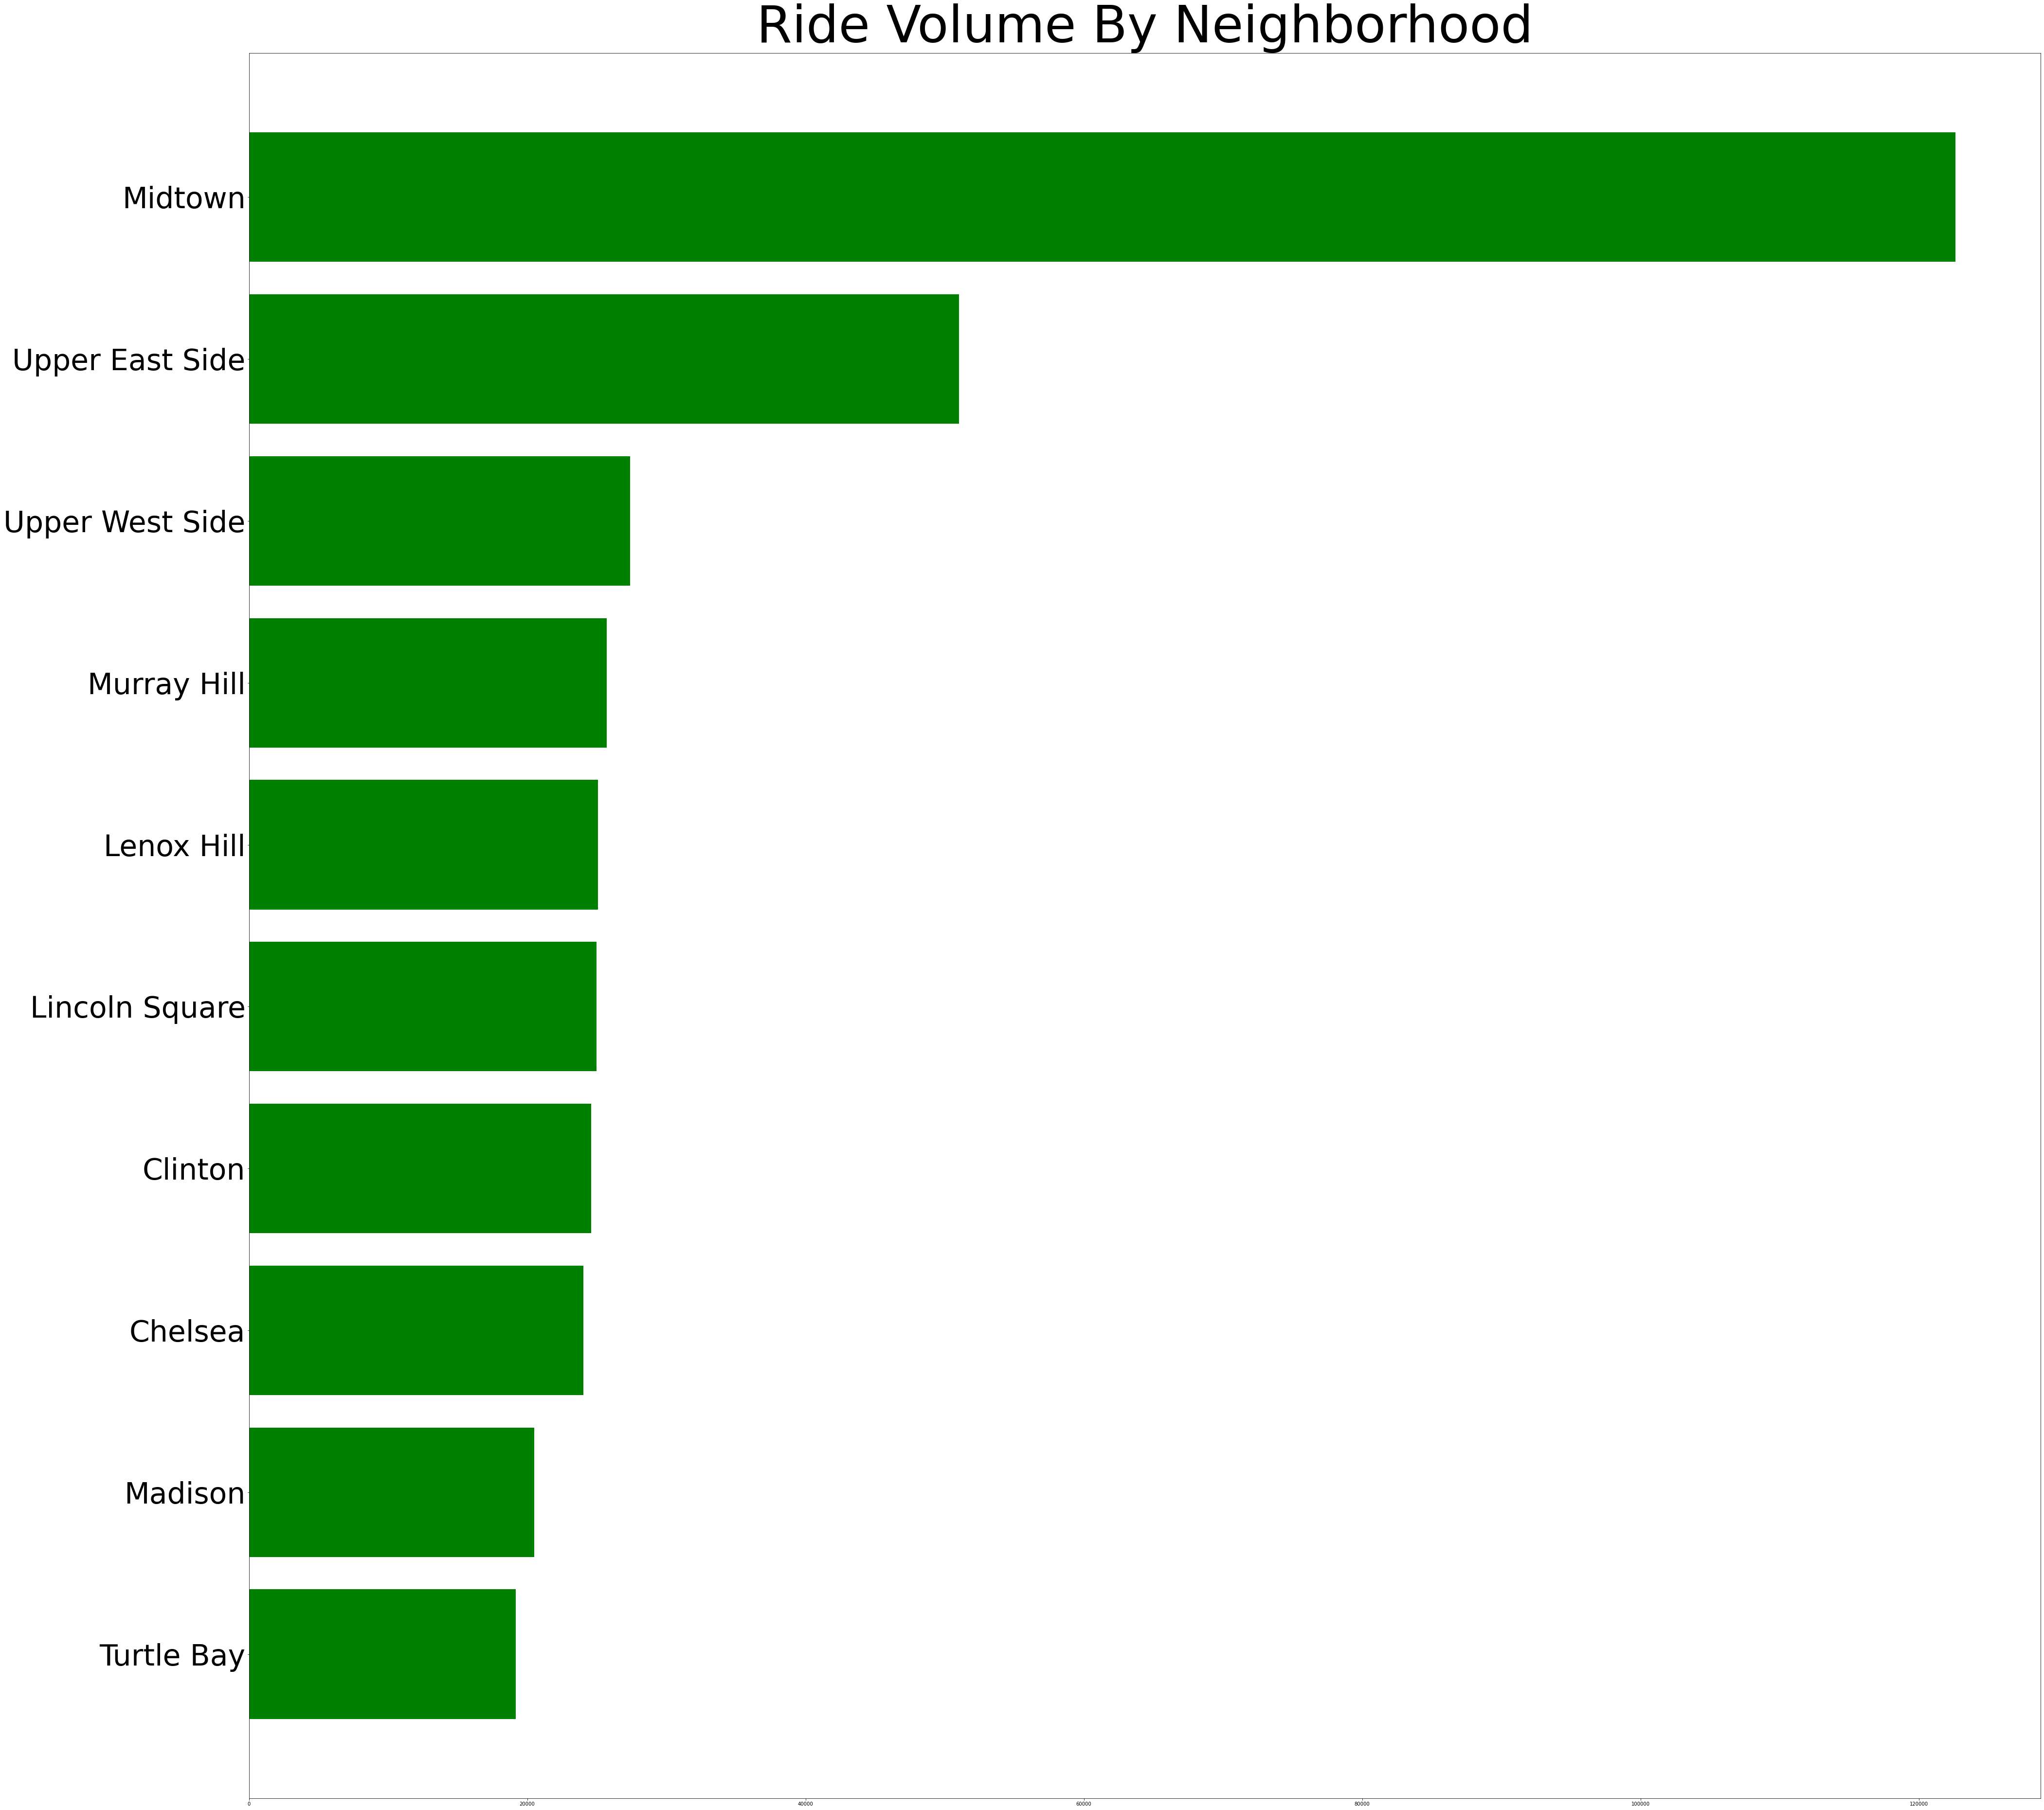

In [8]:
zone_count = manhattan_taxi_zones['zone'].value_counts().head(10)
neighborhood_count = pd.DataFrame(zone_count).reset_index()
neighborhood_count.columns = ['Neighborhood','Rides']
neighborhood_count = neighborhood_count.sort_values('Rides')
x_axis = neighborhood_count['Neighborhood']
y_axis = neighborhood_count['Rides']
x = neighborhood_count.head(10)['Neighborhood']
y = neighborhood_count.head(10)['Rides']
x = neighborhood_count['Neighborhood']
y = neighborhood_count['Rides']
plt.figure(figsize=(66,66))
plt.barh(x,y,color='green')
plt.yticks(size=60)
plt.title("Ride Volume By Neighborhood",size=105)
plt.show()




# Ride Volume Per Day #

In [28]:
# Checking to make sure we have data points for every day

ride_volume_per_day = manhattan_taxi_zones["tpep_pickup_datetime"].value_counts()
ride_volume_per_day_df = pd.DataFrame(ride_volume_per_day)
ride_volume_per_day_dfreset = ride_volume_per_day_df.reset_index()


# plt.figure(figsize=(16,3))
# ride_volume_per_day.plot.line()

ride_volume_per_day_dfrename = ride_volume_per_day_dfreset.rename(columns = {'index': 'date', 'tpep_pickup_datetime': 'Ride Volume'})
ride_volume_per_day_dfrename.sort_values('date').head(40)

,date,Ride Volume
178,2019-01-01,2107
173,2019-01-02,2235
153,2019-01-03,2624
131,2019-01-04,2787
132,2019-01-05,2786
168,2019-01-06,2399
155,2019-01-07,2616
134,2019-01-08,2771
94,2019-01-09,3035
41,2019-01-10,3281


# Ride Volume Per Month #

In [10]:
# Finding average of ride volume per month
# Used as baseline to calculate % change

ride_volume_per_day_dfrename['month'] = pd.DatetimeIndex(ride_volume_per_day_dfrename['date']).month
avg_vol_month = round(ride_volume_per_day_dfrename.groupby(['month']).mean(),0)
avg_vol_month = avg_vol_month.rename(columns = {'Ride Volume': 'Avg Ride Volume'})
avg_vol_month



,Avg Ride Volume
month,
1,2921.0
2,3256.0
3,2937.0
4,3027.0
5,2923.0
6,3008.0


In [11]:
# Finding average of ride volume per month
# Used as baseline to calculate % change

ride_volume_per_day_dfrename['month'] = pd.DatetimeIndex(ride_volume_per_day_dfrename['date']).month
avg_vol_month = round(ride_volume_per_day_dfrename.groupby(['month']).mean(),0)
avg_vol_month = avg_vol_month.rename(columns = {'Ride Volume': 'Avg Ride Volume'})
avg_vol_month_reset = avg_vol_month.reset_index()
avg_vol_month_reset

,month,Avg Ride Volume
0,1,2921.0
1,2,3256.0
2,3,2937.0
3,4,3027.0
4,5,2923.0
5,6,3008.0


# Weather Data
* Top 10 Days for each Weather type (Rain, Snow, Tmax, Tmin, Wind)
* Create DF with all the days above removed (normal weather)
* Visuals to show above

In [12]:
url = "https://api.meteostat.net/v2/point/daily"
headers = ({'x-api-key':meteostat_api_key})
params = ({'lat': '40.757786',
           'lon': '-73.986347',
           'start': '2019-01-01',
           'end': '2019-06-01'
          })
response = requests.get(url, params = params, headers = headers).json()
response
ny_df_jan_jun = pd.DataFrame(response['data'])
ny_cleaned_jan_jun = ny_df_jan_jun.rename(columns = {'tavg': 'Avg Temp',
              'tmin': 'Min Temp',
              'tmax': 'Max Temp',
              'prcp': 'Precipitation',
              'snow': 'Snowfall',
              'wdir': 'Wind Direction',
              'wspd': 'Wind Speed',
              'wpgt': 'Wind Peak Gust',
              'pres': 'Air Pressure',
              'tsun': 'Total Sun Duration'
             })
ny_cleaned_jan_jun.head()

,date,Avg Temp,Min Temp,Max Temp,Precipitation,Snowfall,Wind Direction,Wind Speed,Wind Peak Gust,Air Pressure,Total Sun Duration
0,2019-01-01,10.2,4.3,14.3,2.0,0,274.0,24,None,None,None
1,2019-01-02,3.6,1.6,4.9,0.0,0,NaN,12,None,None,None
2,2019-01-03,5.0,-0.1,7.1,0.0,0,NaN,14,None,None,None
3,2019-01-04,2.8,-1.7,7.7,0.0,0,NaN,12,None,None,None
4,2019-01-05,6.5,4.9,8.2,15.5,0,160.0,17,None,None,None


In [13]:
url_2 = "https://api.meteostat.net/v2/point/daily"
headers_2 = ({'x-api-key':meteostat_api_key})
params_2 = ({'lat': '40.757786',
           'lon': '-73.986347',
           'start': '2019-01-01',
           'end': '2019-12-31'
          })
response_2 = requests.get(url_2, params = params_2, headers = headers_2).json()
response_2

ny_df_jan_dec = pd.DataFrame(response_2['data'])
ny_cleaned_jan_dec = ny_df_jan_dec.rename(columns = {'tavg': 'Avg Temp',
              'tmin': 'Min Temp',
              'tmax': 'Max Temp',
              'prcp': 'Precipitation',
              'snow': 'Snowfall',
              'wdir': 'Wind Direction',
              'wspd': 'Wind Speed',
              'wpgt': 'Wind Peak Gust',
              'pres': 'Air Pressure',
              'tsun': 'Total Sun Duration'
             })
ny_cleaned_jan_dec.head()

,date,Avg Temp,Min Temp,Max Temp,Precipitation,Snowfall,Wind Direction,Wind Speed,Wind Peak Gust,Air Pressure,Total Sun Duration
0,2019-01-01,10.2,4.3,14.3,2.0,0,274.0,24,None,None,None
1,2019-01-02,3.6,1.6,4.9,0.0,0,NaN,12,None,None,None
2,2019-01-03,5.0,-0.1,7.1,0.0,0,NaN,14,None,None,None
3,2019-01-04,2.8,-1.7,7.7,0.0,0,NaN,12,None,None,None
4,2019-01-05,6.5,4.9,8.2,15.5,0,160.0,17,None,None,None


In [14]:
# Top 10 Rain Data
precipitation_df = weather_df_cleaned.sort_values(by="Precipitation",ascending=False).reset_index(drop=True)
final_precipitation_df = precipitation_df.iloc[:10]
final_precipitation_df['month'] = pd.DatetimeIndex(final_precipitation_df['date']).month

# Top 10 Snow Data
snow_df = weather_df_cleaned.sort_values(by="Snowfall",ascending=False).reset_index(drop=True)
final_snow_df = snow_df.iloc[:10]
final_snow_df['month'] = pd.DatetimeIndex(final_precipitation_df['date']).month

# Top 10 Wind Data
wind_df = weather_df_cleaned.sort_values(by="Wind Speed",ascending=False).reset_index(drop=True)
final_wind_df = wind_df.iloc[:10]
final_wind_df['month'] = pd.DatetimeIndex(final_wind_df['date']).month

# Top 10 Max Temp Data
tmax_df = weather_df_cleaned.sort_values(by="Max Temp",ascending=False).reset_index(drop=True)
final_tmax_df = tmax_df.iloc[:10]
final_tmax_df['month'] = pd.DatetimeIndex(final_tmax_df['date']).month

# Top 10 Min Temp Data (lowest)
tmin_df = weather_df_cleaned.sort_values(by="Min Temp",ascending=True).reset_index(drop=True)
final_tmin_df = tmin_df.iloc[:10]
final_tmin_df['month'] = pd.DatetimeIndex(final_tmin_df['date']).month

final_precipitation_df
# final_snow_df
# final_wind_df
# final_tmax_df
# final_tmin_df





C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,date,Min Temp,Max Temp,Precipitation,Snowfall,Wind Speed,month
0,2019-05-05,11.0,14.3,38.9,0,16,5
1,2019-05-12,6.6,14.9,37.6,0,21,5
2,2019-01-20,-10.6,4.9,27.2,0,26,1
3,2019-03-21,5.5,8.8,25.4,0,15,3
4,2019-04-15,7.7,21.0,25.4,0,31,4
5,2019-01-24,1.6,14.9,24.9,0,27,1
6,2019-02-20,-3.3,0.5,21.6,0,10,2
7,2019-05-13,6.0,9.9,21.3,0,14,5
8,2019-02-12,-3.3,2.1,20.6,0,18,2
9,2019-02-24,2.7,8.2,20.6,0,23,2


# Top 10 Weather Graphs #

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

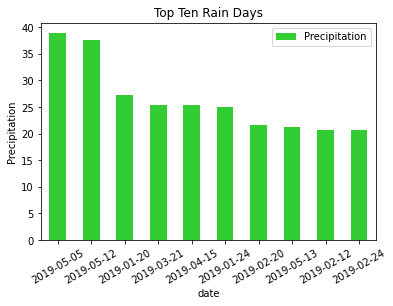

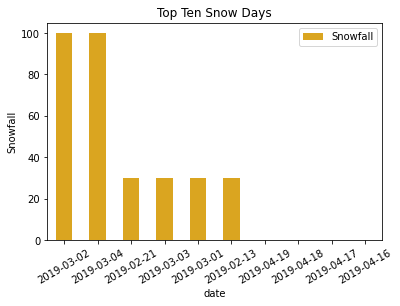

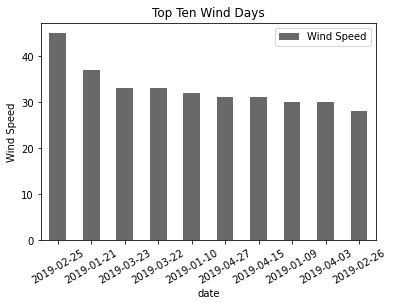

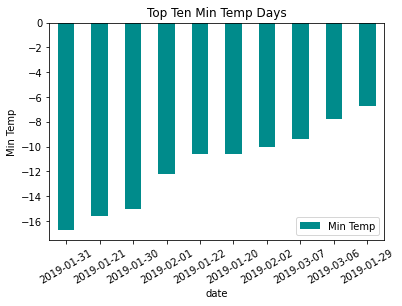

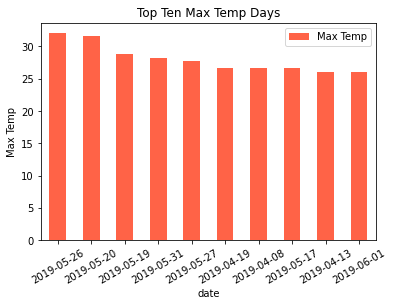

In [15]:
# Top 10 Weather Graphs
# Rain
final_precipitation_df.plot.bar(x="date",y="Precipitation", color = "limegreen")
plt.ylabel("Precipitation")
plt.title("Top Ten Rain Days")
plt.xticks(rotation=30, horizontalalignment="center")

# Snow
final_snow_df.plot.bar(x="date",y="Snowfall", color = "goldenrod")
plt.ylabel("Snowfall")
plt.title("Top Ten Snow Days")
plt.xticks(rotation=30, horizontalalignment="center")

# Wind
final_wind_df.plot.bar(x="date",y="Wind Speed",color="dimgrey")
plt.ylabel("Wind Speed")
plt.title("Top Ten Wind Days")
plt.xticks(rotation=30, horizontalalignment="center")

# Tmin
final_tmin_df.plot.bar(x="date",y="Min Temp", color="darkcyan")
plt.ylabel("Min Temp")
plt.title("Top Ten Min Temp Days")
plt.xticks(rotation=30, horizontalalignment="center")

# Tmax
final_tmax_df.plot.bar(x="date",y="Max Temp", color = "tomato")
plt.ylabel("Max Temp")
plt.title("Top Ten Max Temp Days")
plt.xticks(rotation=30, horizontalalignment="center")

# Taxi Ride Volume vs Weather
* Ride volume for each day in each Top 10 weather types
* Average ride volume for "normal weather" days for each month
* Difference in Top 10 ride volumes vs "normal weather" ride volumes for the month that 


In [45]:
# Merge Rain and Ride Vol per day; Merge Avg ride vol by month
rain_rides = pd.merge(final_precipitation_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
rain_rides_avg = pd.merge(rain_rides, avg_vol_month_reset, how = 'left', on = 'month')
rain_rides_avg['% Change in Rides'] = (rain_rides_avg['Ride Volume'] - rain_rides_avg['Avg Ride Volume']) / rain_rides_avg['Avg Ride Volume']

# Merge Snow and Ride Vol per day; Merge Avg ride vol by month
snow_rides = pd.merge(final_snow_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
snow_rides_avg = pd.merge(snow_rides, avg_vol_month_reset, how = 'left', on = 'month')
snow_rides_avg['% Change in Rides'] = (snow_rides_avg['Ride Volume'] - snow_rides_avg['Avg Ride Volume']) / snow_rides_avg['Avg Ride Volume']

# Merge Wind and Ride Vol per day; Merge Avg ride vol by month
wind_rides = pd.merge(final_wind_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
wind_rides_avg = pd.merge(wind_rides, avg_vol_month_reset, how = 'left', on = 'month')
wind_rides_avg['% Change in Rides'] = (wind_rides_avg['Ride Volume'] - wind_rides_avg['Avg Ride Volume']) / wind_rides_avg['Avg Ride Volume']

# Merge Max Temp and Ride Vol per day; Merge Avg ride vol by month
tmax_rides = pd.merge(final_tmax_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
tmax_rides_avg = pd.merge(tmax_rides, avg_vol_month_reset, how = 'left', on = 'month')
tmax_rides_avg['% Change in Rides'] = (tmax_rides_avg['Ride Volume'] - tmax_rides_avg['Avg Ride Volume']) / tmax_rides_avg['Avg Ride Volume']

# Merge Min Temp and Ride Vol per day; Merge Avg ride vol by month
tmin_rides = pd.merge(final_tmin_df,ride_volume_per_day_dfrename, how = 'left', on = 'date')
tmin_rides_avg = pd.merge(tmin_rides, avg_vol_month_reset, how = 'left', on = 'month')
tmin_rides_avg['% Change in Rides'] = (tmin_rides_avg['Ride Volume'] - tmin_rides_avg['Avg Ride Volume']) / tmin_rides_avg['Avg Ride Volume']

rain_rides_avg
# snow_rides_avg
# wind_rides_avg
# tmax_rides_avg
# tmin_rides_avg


,date,Min Temp,Max Temp,Precipitation,Snowfall,Wind Speed,month,Ride Volume,Avg Ride Volume,% Change in Rides
0,2019-05-05,11.0,14.3,38.9,0,16,5,2767,2923.0,-0.053370
1,2019-05-12,6.6,14.9,37.6,0,21,5,2661,2923.0,-0.089634
2,2019-01-20,-10.6,4.9,27.2,0,26,1,2414,2921.0,-0.173571
3,2019-03-21,5.5,8.8,25.4,0,15,3,3242,2937.0,0.103847
4,2019-04-15,7.7,21.0,25.4,0,31,4,2985,3027.0,-0.013875
5,2019-01-24,1.6,14.9,24.9,0,27,1,3431,2921.0,0.174598
6,2019-02-20,-3.3,0.5,21.6,0,10,2,3183,3256.0,-0.022420
7,2019-05-13,6.0,9.9,21.3,0,14,5,2877,2923.0,-0.015737
8,2019-02-12,-3.3,2.1,20.6,0,18,2,3036,3256.0,-0.067568
9,2019-02-24,2.7,8.2,20.6,0,23,2,2654,3256.0,-0.184889


,Min Temp,Wind,Snow,Rain,Max Temp
0,4.51%,1.22%,1.14%,-3.43%,-7.71%


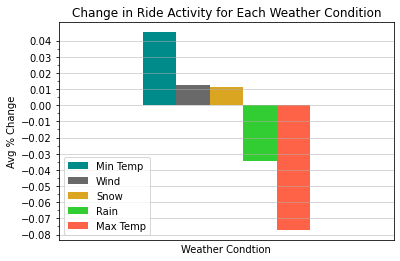

In [47]:
# Plotting the change in ride volume

# Calculate the average change for top 10 days for each category
pd.options.display.float_format = '{:,.2%}'.format
avg_rain_change = rain_rides_avg['% Change in Rides'].mean()
avg_snow_change = snow_rides_avg['% Change in Rides'].mean()
avg_wind_change = wind_rides_avg['% Change in Rides'].mean()
avg_tmax_change = tmax_rides_avg['% Change in Rides'].mean()
avg_tmin_change = tmin_rides_avg['% Change in Rides'].mean()

# Store data in dataframe for plotting
avg_change_df = pd.DataFrame({'Min Temp': avg_tmin_change,
                              'Wind': avg_wind_change,
                              'Snow': avg_snow_change,
                              'Rain': avg_rain_change,
                              'Max Temp': avg_tmax_change}, 
                             index=[0])

# Plot Formatting
avg_plot = avg_change_df.plot.bar(color=['darkcyan','dimgray','goldenrod','limegreen' ,'tomato'])
avg_plot.set_yticks(np.arange(-.08, .045, step=.005), minor=True)
avg_plot.set_yticks(np.arange(-.08, .045, step=.01), minor=False)
avg_plot.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
avg_plot.set_ylabel('Avg % Change')
avg_plot.set_xlabel('Weather Condtion')
avg_plot.set_xticks([])
avg_plot.set_title('Change in Ride Activity for Each Weather Condition')
avg_plot
avg_change_df


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

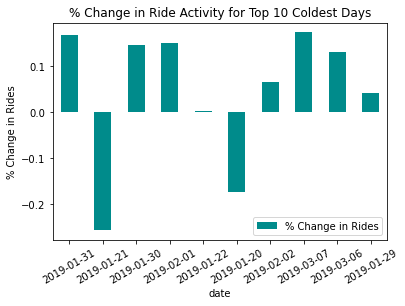

In [48]:
# Display Top 10 days for Min Temp to show the fu
tmin_rides_avg.plot.bar(x="date",y='% Change in Rides', color = "darkcyan")
plt.ylabel("% Change in Rides")
plt.title("% Change in Ride Activity for Top 10 Coldest Days")
plt.xticks(rotation=30, horizontalalignment="center")

# Stats Test #

In [49]:
population1 = ny_cleaned_jan_jun["Min Temp"]
population2 = ny_cleaned_jan_dec["Min Temp"]

population1.mean()
population2.mean()

stats.ttest_ind(population1, population2, axis=None, equal_var=True)

Ttest_indResult(statistic=-6.2543188295446654, pvalue=8.396433589512986e-10)



## Comments about the above...
#### Ride Volume Change for Min Temp
* The days that we see a negative decline (1/21 & 1/20) are more than likely due to Martin Luther King Jr. holiday and being a Sunday
* We might need to filter out weekends (Sat and/or Sun) if we find that they are contradicting week days

#### Ride Volume Change for Max Temp
* Same as min temp, we also see the a holiday in the top 10. The sunday before and day of Memorial Day we see drastic declines from the average ride volume
* Seeing more and more reason to remove weekends